### Turning FC Layers into Conv Layers

**Turning Fully Connected (FC) Layers into Convolutional (Conv) Layers** là một kỹ thuật trong thiết kế mạng nơ-ron tích chập (CNN) nhằm cải thiện hiệu suất và tính linh hoạt của mô hình. Kỹ thuật này chuyển đổi các lớp fully connected thành các lớp tích chập để tận dụng các ưu điểm của các lớp tích chập, đặc biệt là khi áp dụng trên các kích thước đầu vào khác nhau.

### Tác dụng của việc chuyển đổi FC Layers thành Conv Layers

1. **Tăng hiệu quả tính toán**:
   - Các lớp FC thường có rất nhiều tham số, đặc biệt là khi kích thước đầu vào lớn. Các lớp Conv có thể giảm số lượng tham số này, làm cho mô hình nhẹ hơn và nhanh hơn.

2. **Linh hoạt với kích thước đầu vào**:
   - Các lớp FC yêu cầu một kích thước đầu vào cố định, trong khi các lớp Conv có thể hoạt động trên các kích thước đầu vào khác nhau. Điều này giúp mô hình có thể xử lý các ảnh đầu vào với kích thước biến đổi.

3. **Bảo toàn cấu trúc không gian**:
   - Các lớp Conv duy trì cấu trúc không gian của ảnh, cho phép mô hình học các đặc trưng không gian một cách hiệu quả hơn.

4. **Tăng khả năng tổng quát hóa**:
   - Việc chuyển đổi giúp mô hình tận dụng các đặc trưng không gian và giảm nguy cơ overfitting do số lượng tham số ít hơn.

### Ví dụ cụ thể

Giả sử bạn có một mạng CNN với một lớp fully connected như sau:

1. **Mô hình gốc với FC Layer**:

```plaintext
Input: 7x7x512 (Feature Map từ các lớp trước)
Flatten: 25088 (7 * 7 * 512)
Fully Connected Layer: 4096 neurons
```

- Số lượng tham số của lớp fully connected này sẽ là (25088 x 4096 + 4096 = 102764544) tham số.

2. **Chuyển đổi thành Conv Layer**:

Thay vì flatten đầu vào và sử dụng một lớp fully connected, ta có thể sử dụng một lớp tích chập với kernel (7 x 7):

```plaintext
Input: 7x7x512 (Feature Map từ các lớp trước)
Convolutional Layer: 4096 filters, kernel size 7x7, stride 1, padding 0
Output: 1x1x4096
```

- Số lượng tham số của lớp Conv này sẽ là (7 x 7 x 512 x 4096 + 4096 = 102760448) tham số.

### Cách thức hoạt động

- **Flattening**: Trong lớp fully connected, đầu vào thường được flatten (làm phẳng) thành một vector dài.
- **Convolutional Layer**: Thay vì làm phẳng, lớp Conv với kích thước kernel bằng với kích thước của bản đồ đặc trưng đầu vào (ở đây là (7 x 7)) sẽ hoạt động trên bản đồ đặc trưng, tạo ra đầu ra có kích thước (1 x 1 x filters).

### Áp dụng trong các mô hình thực tế

- **VGG16 và VGG19**: Các mô hình VGG chuyển đổi các lớp fully connected cuối cùng thành các lớp tích chập để tăng tính linh hoạt.
- **ResNet**: Các phiên bản của ResNet cũng tận dụng kỹ thuật này để giảm số lượng tham số và tăng khả năng tổng quát hóa.

### Ví dụ chi tiết:

Giả sử ta có mô hình VGG16 với các lớp fully connected cuối cùng như sau:

```plaintext
Input: 7x7x512 (Feature Map)
Flatten: 25088
Fully Connected Layer: 4096 neurons
```

Chuyển đổi thành Conv Layer:

```plaintext
Input: 7x7x512 (Feature Map)
Conv Layer: 4096 filters, kernel size 7x7, stride 1, padding 0
Output: 1x1x4096
```

### Kết luận

Việc chuyển đổi các lớp fully connected thành các lớp convolutional là một kỹ thuật quan trọng trong việc thiết kế các mạng nơ-ron sâu, đặc biệt là các mạng CNN. Kỹ thuật này giúp tăng hiệu quả tính toán, linh hoạt với các kích thước đầu vào, bảo toàn cấu trúc không gian, và tăng khả năng tổng quát hóa của mô hình. Đây là một bước quan trọng trong việc tối ưu hóa và làm cho các mô hình CNN mạnh mẽ hơn trong các ứng dụng thực tế.

## Bounding box 
1. Khái niệm 
Bounding box là các hình chữ nhật bao xung quanh vật thể mang những thông tin về tọa độ và chiều dài chiều rộng của bounding box. Một bouding box sẽ có 5 giá trị thành viên, cụ thể:

**Δx, Δy** : Độ lệch giữa tọa độ tâm của bounding box dự đoán và tọa độ điểm bên trái trên cùng của grid cell mà nó thuộc về, giá trị của Δx,Δy vì vậy mà nằm trong khoảng [0,1].\
**Δw, Δh** : Chiều rộng, chiều dài của bbox được chuẩn hóa theo kích thước của toàn bộ bức ảnh, giá trị của Δw, Δh nhờ vậy cũng bị ràng buộc trong khoảng [0,1]\
**c(p_c)** : Xác suất bên trong bouding box có vật thể là bao nhiêu.

2. Lý do độ lệch **Δx, Δy** được tính theo grid cell còn **Δw, Δh** lại được chuẩn hóa độ lớn của cả ảnh:

Vật thể sẽ được xác định vị trí theo grid cell, nghĩa là mô hình chỉ quan tâm việc dự đoán giá trị độ lệch ấy mà không cần quan tâm đến chính xác vị trí tâm vật thể ở đâu ( tọa độ cụ thể). Vị trí tâm của vật thể luôn có ràng buộc đến grid cell mà nó thuộc về, nhưng điều này cũng là một yếu điểm lớn của YOLOv1 vì khi một grid cell xác định một tâm vật thể và chỉ dự đoán xác suất một lần duy nhất dù cho có bao nhiêu bounding box trong grid cell => một grid cell tối đa chỉ dự đoán được một vật thể, cả ảnh tối đa chỉ dự đoán được 7* 7 = 49 vật thể.

Còn về phần w, h được chuẩn hóa theo độ lớn của toàn ảnh vì khi đó giá trị của w, h nhỏ và việc dự đoán chiều rộng và chiều dài sẽ không bị ảnh hưởng bởi độ phân giải của ảnh. Ví dụ ảnh đầu vào có là bao nhiêu thì model cũng chỉ việc dự đoán độ lệch chiều dài, chiều rộng trong khoảng [0,1] rồi về sau scale lại l Ngoài ra giá trị w,h trong khoảng [0,1] còn khiến việc tính loss và cập nhật tham số dễ dàng, nhanh chóng hơn.

Ta có công thức chuẩn hóa x, y center về [0,1] như sau:
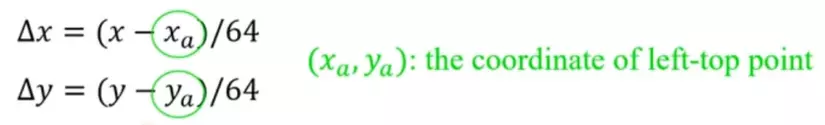

Tọa độ tâm của bounding box (x) trừ đi tọa độ của điểm góc trên cùng bên trái của grid cell, sau đó chia cho chiều rộng của một grid cell( trong ví dụ này là 64) với kích thước toàn ảnh là 448 * 448.\
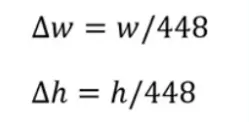

Chuẩn hóa chiều dài chiều rộng của bbox bằng cách chia cho chiều dài, chiều rộng tương ứng của toàn ảnh, với YOLOv1 là 448* 448.

Như vậy sau khi chuẩn hóa bằng công thức trên, với tọa độ tâm của vật thể là (200,311), Tọa độ góc trên cùng bên trái của grid cell chứa vật thể là (192,256), ta có 4 tọa độ của bounding box:
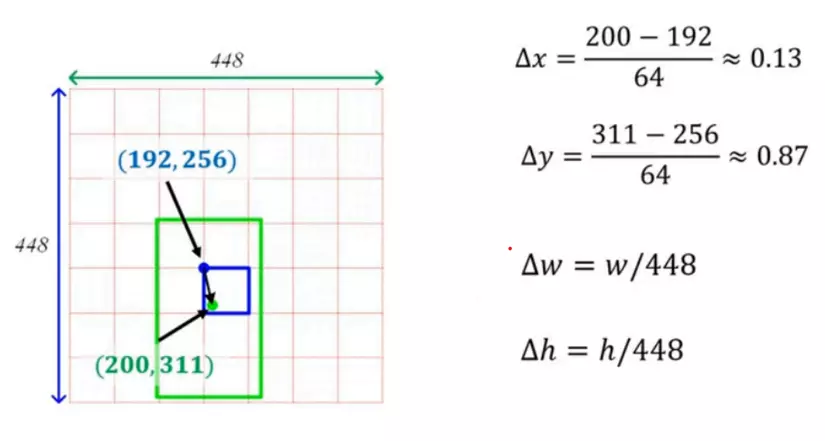
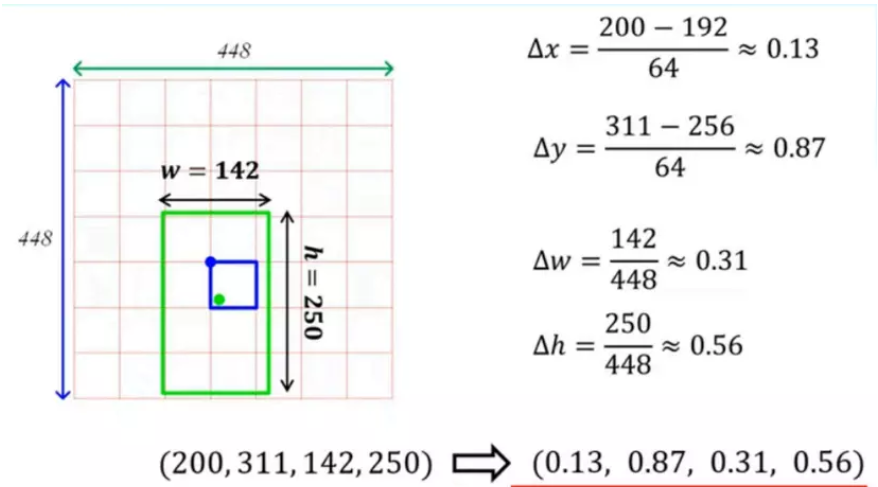

Sau khi có các giá trị tọa độ bounding box thì ta tiến hành label encoding ground truth box chuẩn bị cho quá trình training. Một grid cell sẽ được mã hóa thành một vector với các giá trị (Δx, Δy, Δw, Δh, c, p1, p1, ... ,pn), c là xác suất ground truth bounding box chứa vật thể: 1 nếu chứa vật thể, bằng 0 nếu không có vật thể nào, nếu không có vật thể thì c = 0 kéo theo toàn bộ giá trị còn lại bằng 0. One- hot encoding label (p1,...pn): N là số lượng các loại nhãn mà mô hình phân loại để nhận diện vật thể trong bounding box đó là gì, các p là các xác suất của từng class, ground truth sẽ là class thứ i mà pi =1. Cụ thể như sau: Giả sử ta có 49 grid cell, mỗi grid cell lại được mã hóa thành một vector có độ lớn 5 +N:\
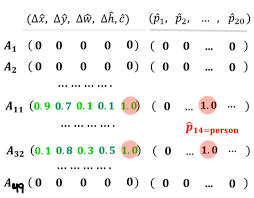

Nếu không có vật thể, mọi giá trị của vector bằng 0, nếu có vật thể (A11) với c =1 thì tọa độ ground truth là (0.9,0.7,0.1,0.1), p14 =1 chỉ ra rằng trong trong bbox là class person.

## IOU
1. Khái niệm
IoU(intersection over union) là công thức tính xem mức độ trùng nhau của bounding box dự đoán và ground truth box. IoU đi tính tỷ lệ trùng khớp của 2 bounding box, do vậy giá trị của Iou chỉ nằm trong khoảng [0,1], bằng 0 khi 2 box không hề giao nhau, 1 khi 2 box hoàn toàn trùng khớp. Công thức tính IoU:\
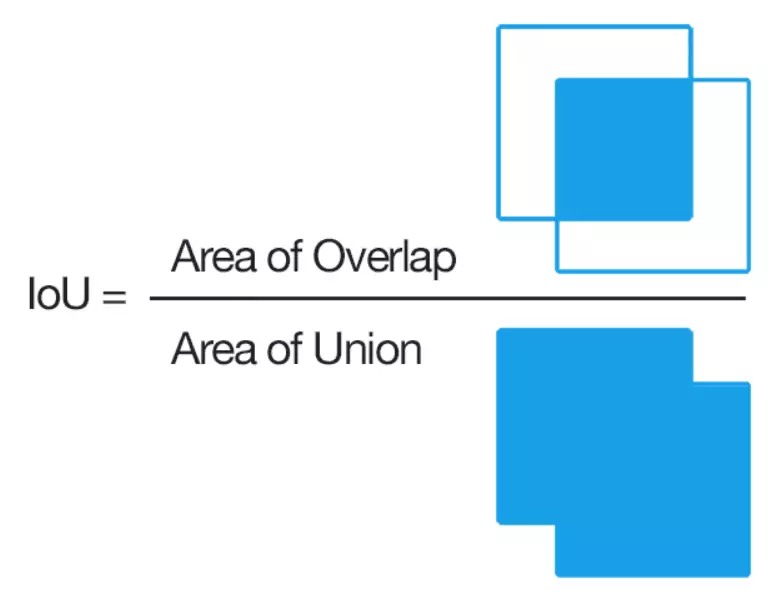
Phần tử là diện tích phần giao nhau của predicted bounding box và ground truth box, phần mẫu là tổng diện tích của 2 box trên hợp lại. Người ta sẽ quy định một Ngưỡng, thường thì IoU score >= 0.5 có nghĩa là predicted bouding box có độ tương đồng cao với ground truth box.

### Non-maximum suppression
Sau quá trình predicted bounding box của model, vẫn còn nhiều bounding box trùng lặp lên nhau với ngưỡng IoU với ground truth box cao. Vậy làm thế nào để ta có thể loại bỏ đi những box dự đoán cùng một vật thể, chỉ giữ lại 1 box với độ chính xác cao nhất cho một vật thể. Câu trả lời là sử dụng thuật toán Non maximum Suppression. Thuật toán như sau:

Bước 1: Ta có một list các bounding box còn lại gọi là P(box1, box2, box3,....) được sắp xếp theo thứ tự giảm dần về objeccness score. Những box đầu có độ tự tin cao sẽ được ưu tiên trước. Tiếp theo ta tạo một danh sách S gồm các box chuẩn đầu ra cuối cùng.

Bước 2: Lấy box đầu tiên từ tập P bỏ vào tập S, xóa box đó khỏi tập P sau đó tính tỷ lệ IoU với từng box còn lại trong tập P, nếu box nào trong tập 3 có tỷ lệ IoU so với box đang lấy làm chuẩn nhỏ hơn ngưỡng đặt ra (thường là 0,5) sẽ bị xóa khỏi tập P.\
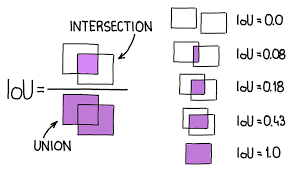\
IoU lớn nghĩa là mức độ trùng lặp của 2 box lớn -> loại bỏ

Bước 3: Nếu tập P vẫn còn phần tử thì tiếp tục lặp lại bước 2 cho đến khi P không còn phần tử nào nữa. Kết quả ta được tập S gồm các box phân biệt nhau cho từng vật thể.

### Anchor Box trong Object Detection

**Anchor Box** là một khái niệm quan trọng trong các mô hình phát hiện đối tượng (object detection), như YOLO (You Only Look Once), Faster R-CNN, và SSD (Single Shot MultiBox Detector). Anchor Box giúp mô hình dự đoán các hộp giới hạn (bounding boxes) có kích thước và tỉ lệ khác nhau.

### Vai trò và Cách hoạt động của Anchor Box

#### 1. Định nghĩa Anchor Box
- **Anchor Box** là các hộp giới hạn được định nghĩa trước với các kích thước và tỉ lệ khác nhau. 
- Mỗi grid cell trong hình ảnh có thể có nhiều anchor box, chẳng hạn 2, 5, hoặc nhiều hơn tùy vào mô hình và bài toán cụ thể.

#### 2. Sử dụng Anchor Box trong quá trình dự đoán
- **Bước 1: Định nghĩa các Anchor Box**: Trước tiên, một số anchor box với các tỉ lệ và kích thước khác nhau được định nghĩa trước. Ví dụ, có thể có các anchor box với các tỉ lệ 1:1, 2:1, 1:2, v.v.
- **Bước 2: Dự đoán điều chỉnh (offset)**: Mô hình sẽ dự đoán các giá trị điều chỉnh (offset) cho từng anchor box để chúng phù hợp hơn với đối tượng trong grid cell. Các giá trị điều chỉnh bao gồm:
  - \(\Delta x, \Delta y\): Dịch chuyển tọa độ trung tâm của anchor box.
  - \(\Delta w, \Delta h\): Thay đổi chiều rộng và chiều cao của anchor box.
- **Bước 3: Điều chỉnh Bounding Box**: Các giá trị điều chỉnh được áp dụng lên anchor box để tạo ra các bounding box dự đoán cuối cùng. Điều này giúp các bounding box sát với ground truth nhất có thể.

#### 3. Quy trình tổng quát
1. **Grid Division**: Hình ảnh đầu vào được chia thành các grid cell.
2. **Anchor Box Assignment**: Mỗi grid cell sẽ có nhiều anchor box với các tỉ lệ và kích thước khác nhau.
3. **Prediction**: Mô hình dự đoán các giá trị điều chỉnh cho mỗi anchor box trong mỗi grid cell.
4. **Bounding Box Adjustment**: Áp dụng các giá trị điều chỉnh lên anchor box để tạo ra các bounding box dự đoán.
5. **Non-Maximum Suppression (NMS)**: Loại bỏ các bounding box dư thừa, giữ lại các bounding box có confidence score cao nhất.

### Kết luận

Anchor Box là các hộp giới hạn được định nghĩa trước, đóng vai trò quan trọng trong việc giúp mô hình phát hiện đối tượng dự đoán các bounding box một cách chính xác. Quá trình điều chỉnh các anchor box dựa trên các giá trị điều chỉnh dự đoán giúp tạo ra các bounding box sát với ground truth nhất, từ đó nâng cao hiệu suất và độ chính xác của mô hình phát hiện đối tượng.